In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
import numpy as np
import cv2
import os
import zipfile
from sklearn.metrics import roc_auc_score

# Step 2: Define Paths
drive_path = "/content/drive/MyDrive/leaf_dataset.zip"  # Update this with your actual path
extract_to = "/content/leaf_dataset"

# Step 3: Unzip the Dataset (if not already extracted)
if not os.path.exists(extract_to):
    with zipfile.ZipFile(drive_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

# Step 4: Load images (Only 3 Leaf Classes)
def load_images(folder, img_size=(128, 128)):
    images = []
    for subfolder in os.listdir(folder):  # Iterate through leaf class folders
        subfolder_path = os.path.join(folder, subfolder)
        if os.path.isdir(subfolder_path):
            for filename in os.listdir(subfolder_path):
                img_path = os.path.join(subfolder_path, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, img_size) / 255.0  # Normalize
                    images.append(img)
    return np.array(images)

leaf_images = load_images(extract_to)

# Step 5: Define Autoencoder Model
input_img = Input(shape=(128, 128, 3))

x = Conv2D(32, (3, 3), activation="relu", padding="same")(input_img)
x = MaxPooling2D((2, 2), padding="same")(x)
x = Conv2D(16, (3, 3), activation="relu", padding="same")(x)
x = MaxPooling2D((2, 2), padding="same")(x)
encoded = Conv2D(8, (3, 3), activation="relu", padding="same")(x)

x = Conv2D(8, (3, 3), activation="relu", padding="same")(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation="relu", padding="same")(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation="sigmoid", padding="same")(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer="adam", loss="mse")

# Step 6: Train the Autoencoder
autoencoder.fit(leaf_images, leaf_images, epochs=50, batch_size=16, shuffle=True)

# Step 7: Save the Model to Drive
model_path = "/content/drive/MyDrive/leaf_autoencoder.h5"
autoencoder.save(model_path)
print(f"Model saved to: {model_path}")

# Step 8: Function to Detect Leaf or Not
def is_leaf(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (128, 128)) / 255.0
    img = np.expand_dims(img, axis=0)

    reconstructed = autoencoder.predict(img)
    error = np.mean((img - reconstructed) ** 2)

    threshold = 0.02  # Adjust based on experiments
    return "Leaf" if error < threshold else "Not Leaf"

# Test the model
test_image = "/content/leaf_dataset/some_image.jpg"  # Update this path
print(is_leaf(test_image))


Mounted at /content/drive
Epoch 1/50


ValueError: Exception encountered when calling Functional.call().

[1mInvalid input shape for input Tensor("data:0", shape=(16,), dtype=float32). Expected shape (None, 128, 128, 3), but input has incompatible shape (16,)[0m

Arguments received by Functional.call():
  • inputs=tf.Tensor(shape=(16,), dtype=float32)
  • training=True
  • mask=None

In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
import numpy as np
import cv2
import os
import zipfile
from sklearn.metrics import roc_auc_score

# Step 2: Define Paths
drive_path = "/content/drive/MyDrive/leaf_dataset.zip"  # Update this with your actual path
extract_to = "/content/leaf_dataset"

# Step 3: Unzip the Dataset (if not already extracted)
if not os.path.exists(extract_to):
    with zipfile.ZipFile(drive_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

# Step 4: Load images (Only 3 Leaf Classes)
def load_images(folder, img_size=(128, 128)):
    images = []
    for subfolder in os.listdir(folder):  # Iterate through leaf class folders
        subfolder_path = os.path.join(folder, subfolder)
        if os.path.isdir(subfolder_path):
            for filename in os.listdir(subfolder_path):
                img_path = os.path.join(subfolder_path, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, img_size) / 255.0  # Normalize
                    images.append(img)

    images = np.array(images, dtype=np.float32)

    if len(images) == 0:
        raise ValueError("❌ No images found! Check the dataset path.")

    print(f"✅ Dataset Loaded: {images.shape}")  # Should be (num_samples, 128, 128, 3)

    return images

leaf_images = load_images(extract_to)

# Ensure it's a 4D array
if leaf_images.ndim == 3:
    leaf_images = np.expand_dims(leaf_images, axis=-1)  # Ensure (num_samples, 128, 128, 3)

# Check shape before training
print(f"✅ Final dataset shape: {leaf_images.shape}")

# Step 5: Define Autoencoder Model
input_img = Input(shape=(128, 128, 3))

x = Conv2D(32, (3, 3), activation="relu", padding="same")(input_img)
x = MaxPooling2D((2, 2), padding="same")(x)
x = Conv2D(16, (3, 3), activation="relu", padding="same")(x)
x = MaxPooling2D((2, 2), padding="same")(x)
encoded = Conv2D(8, (3, 3), activation="relu", padding="same")(x)

x = Conv2D(8, (3, 3), activation="relu", padding="same")(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation="relu", padding="same")(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation="sigmoid", padding="same")(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer="adam", loss="mse")

# Step 6: Train the Autoencoder
autoencoder.fit(leaf_images, leaf_images, epochs=50, batch_size=16, shuffle=True)

# Step 7: Save the Model to Drive
model_path = "/content/drive/MyDrive/leaf_autoencoder.h5"
autoencoder.save(model_path)
print(f"✅ Model saved to: {model_path}")

# Step 8: Function to Detect Leaf or Not
def is_leaf(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (128, 128)) / 255.0
    img = np.expand_dims(img, axis=0)

    reconstructed = autoencoder.predict(img)
    error = np.mean((img - reconstructed) ** 2)

    threshold = 0.02  # Adjust based on experiments
    return "Leaf" if error < threshold else "Not Leaf"

# Test the model
test_image = "/content/leaf_dataset/some_image.jpg"  # Update this path
print(is_leaf(test_image))


In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
import numpy as np
import cv2
import os
import zipfile
import shutil  # For moving extracted files

# Step 2: Define Paths
zip_path = "/content/drive/MyDrive/leaf_dataset.zip"  # Update if needed
extract_to = "/content/leaf_dataset"

# Step 3: Unzip the Dataset Properly
if not os.path.exists(extract_to) or len(os.listdir(extract_to)) == 0:
    print("📂 Extracting dataset...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall("/content")  # Extract to a temp location

    # Find the actual dataset folder inside extracted files
    extracted_folders = [f for f in os.listdir("/content") if os.path.isdir(os.path.join("/content", f))]

    # If an extra folder exists, move its contents to /content/leaf_dataset
    for folder in extracted_folders:
        folder_path = os.path.join("/content", folder)
        if os.path.exists(folder_path) and len(os.listdir(folder_path)) > 0:
            print(f"📂 Moving extracted contents from: {folder_path} → {extract_to}")
            shutil.move(folder_path, extract_to)
            break  # Stop after moving the first detected dataset

    print("✅ Dataset extracted successfully!")

# Debugging: Check extracted files
print("📂 Contents of dataset folder:", os.listdir(extract_to))

# Step 4: Load images (Only 3 Leaf Classes)
def load_images(folder, img_size=(128, 128)):
    images = []
    for subfolder in os.listdir(folder):
        subfolder_path = os.path.join(folder, subfolder)
        if os.path.isdir(subfolder_path):  # Ensure it's a valid directory
            for filename in os.listdir(subfolder_path):
                img_path = os.path.join(subfolder_path, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, img_size) / 255.0  # Normalize
                    images.append(img)

    if not images:
        raise ValueError("❌ No images found! Check the dataset structure.")

    images = np.array(images, dtype=np.float32)
    print(f"✅ Dataset Loaded: {images.shape}")  # Should be (num_samples, 128, 128, 3)

    return images

leaf_images = load_images(extract_to)

# Ensure it's a 4D array
if leaf_images.ndim == 3:
    leaf_images = np.expand_dims(leaf_images, axis=-1)  # Ensure (num_samples, 128, 128, 3)

# Check shape before training
print(f"✅ Final dataset shape: {leaf_images.shape}")

# Step 5: Define Autoencoder Model
input_img = Input(shape=(128, 128, 3))

x = Conv2D(32, (3, 3), activation="relu", padding="same")(input_img)
x = MaxPooling2D((2, 2), padding="same")(x)
x = Conv2D(16, (3, 3), activation="relu", padding="same")(x)
x = MaxPooling2D((2, 2), padding="same")(x)
encoded = Conv2D(8, (3, 3), activation="relu", padding="same")(x)

x = Conv2D(8, (3, 3), activation="relu", padding="same")(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation="relu", padding="same")(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation="sigmoid", padding="same")(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer="adam", loss="mse")

# Step 6: Train the Autoencoder
autoencoder.fit(leaf_images, leaf_images, epochs=20, batch_size=16, shuffle=True)

# Step 7: Save the Model to Drive
model_path = "/content/drive/MyDrive/leaf_autoencoder.h5"
autoencoder.save(model_path)
print(f"✅ Model saved to: {model_path}")

Mounted at /content/drive
📂 Extracting dataset...
📂 Moving extracted contents from: /content/.config → /content/leaf_dataset
✅ Dataset extracted successfully!
📂 Contents of dataset folder: ['Rice', 'Banana', 'Coffee', '.config']
✅ Dataset Loaded: (3521, 128, 128, 3)
✅ Final dataset shape: (3521, 128, 128, 3)
Epoch 1/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 0.0479
Epoch 2/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0065
Epoch 3/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0047
Epoch 4/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0039
Epoch 5/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0036
Epoch 6/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0033
Epoch 7/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0031
Epoch 8/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0029
Epoch 9/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0031
Epoch 10/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0028
Epoch 11

✅ Model saved to: /content/drive/MyDrive/leaf_autoencoder.h5


error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Reconstruction Error: 0.001892127363321874
Not Leaf
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


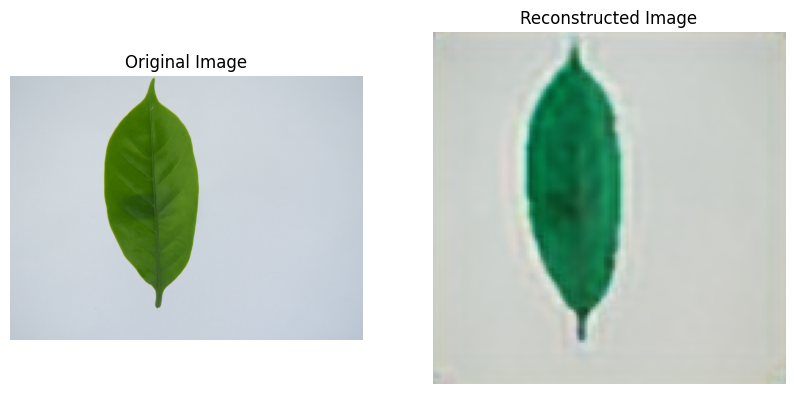

In [ ]:
import matplotlib.pyplot as plt
# Step 8: Function to Detect Leaf or Not
def is_leaf(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (128, 128)) / 255.0
    img = np.expand_dims(img, axis=0)

    reconstructed = autoencoder.predict(img)
    error = np.mean((img - reconstructed) ** 2)

    print(f"Reconstruction Error: {error}")  # Debugging: Print the reconstruction error

    threshold = 0.002  # Adjusted threshold (experiment with values)
    return "Leaf" if error > threshold else "Not Leaf"

# Debugging: Visualize original vs reconstructed image
def plot_comparison(image_path):
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (128, 128)) / 255.0
    img_input = np.expand_dims(img_resized, axis=0)

    reconstructed = autoencoder.predict(img_input)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("Reconstructed Image")
    plt.imshow(reconstructed[0])
    plt.axis("off")

    plt.show()

# Test the model and visualize the result
test_image = "/content/Healthy (2).jpg"  # Update this path with an actual test image
print(is_leaf(test_image))
plot_comparison(test_image)

In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import os
import zipfile
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import cv2

# Step 2: Define Paths
zip_path = "/content/drive/MyDrive/leaf_dataset.zip"  # Update this with the correct path in Drive
extract_to = "/content/leaf_dataset"

# Step 3: Extract Dataset (Check for Nested Folders)
if not os.path.exists(extract_to) or len(os.listdir(extract_to)) == 0:
    print("📂 Extracting dataset...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall("/content")  # Extract in content first
    print("✅ Dataset extracted successfully!")

# Identify the correct dataset folder (since there's an extra folder inside the zip)
extracted_folders = os.listdir("/content")
for folder in extracted_folders:
    folder_path = os.path.join("/content", folder)
    if os.path.isdir(folder_path) and len(os.listdir(folder_path)) == 3:  # Must have 3 subfolders
        extract_to = folder_path
        break

print(f"📂 Final dataset folder: {extract_to}")
print("✅ Subfolders (leaf types):", os.listdir(extract_to))

# Step 4: Load and Preprocess Images
img_size = (128, 128)
batch_size = 16
threshold = 0.7  # Confidence threshold for classifying as "Leaf"

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    extract_to,  # Use the corrected path
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)

val_generator = datagen.flow_from_directory(
    extract_to,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)

# Step 5: Define the CNN Model (Transfer Learning)
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(128, 128, 3))
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation="relu")(x)
output_layer = Dense(len(train_generator.class_indices), activation="softmax")(x)  # 3 Classes

model = Model(inputs=base_model.input, outputs=output_layer)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Step 6: Train the Model
model.fit(train_generator, validation_data=val_generator, epochs=10)

# Step 7: Save Model to Drive
model_path = "/content/drive/MyDrive/leaf_classifier.h5"
model.save(model_path)
print(f"✅ Model saved to: {model_path}")

# Step 8: Function to Classify Images with "Not Leaf" Handling
def classify_image(image_path, threshold=0.7):
    img = cv2.imread(image_path)
    img = cv2.resize(img, img_size) / 255.0
    img = np.expand_dims(img, axis=0)

    preds = model.predict(img)
    max_conf = np.max(preds)
    pred_class = np.argmax(preds)

    if max_conf >= threshold:
        return f"Leaf ({list(train_generator.class_indices.keys())[pred_class]})"
    else:
        return "Not Leaf"

# Step 9: Test the Model
test_image = "fertilizer.png"  # Change to an actual test image
print(classify_image(test_image))


Mounted at /content/drive
📂 Extracting dataset...
✅ Dataset extracted successfully!
📂 Final dataset folder: /content/leaf_dataset
✅ Subfolders (leaf types): ['Rice', 'Banana', 'Coffee']
Found 2818 images belonging to 3 classes.
Found 703 images belonging to 3 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 210s 928ms/step - accuracy: 0.9287 - loss: 0.2306 - val_accuracy: 0.5647 - val_loss: 9.6725
Epoch 2/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 112s 631ms/step - accuracy: 0.9921 - loss: 0.0326 - val_accuracy: 0.5036 - val_loss: 6.3181
Epoch 3/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 106s 601ms/step - accuracy: 0.9872 - loss: 0.0475 - val_accuracy: 0.5107 - val_loss: 14.2806
Epoch 4/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 115s 649ms/step - accuracy: 0.9862 - loss: 0.0539 - val_accuracy: 0.3997 - val_loss: 30.3933
Epoch 5/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 112s 632ms/step - accuracy: 0.9822 - loss: 0.0957 - val_accuracy: 0.5007 - val_loss: 9.9526
Epoch 6/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 133s 756ms/step - accuracy: 0.9888 - loss: 0.0368 - val_accuracy: 0.3997 - val_loss: 13.7806
Epoch 7/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 114s 646ms/step - accuracy: 0.9933 - loss: 0.0262 - val_accuracy: 0.4196 - val_loss: 17.3909
Epoch 8/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 112s 635ms/step - accuracy: 0.99

✅ Model saved to: /content/drive/MyDrive/leaf_classifier.h5


error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [ ]:
# Step 8: Function to Classify Images with "Not Leaf" Handling
def classify_image(image_path, threshold=0.7):
    img = cv2.imread(image_path)
    img = cv2.resize(img, img_size) / 255.0
    img = np.expand_dims(img, axis=0)

    preds = model.predict(img)
    max_conf = np.max(preds)
    pred_class = np.argmax(preds)

    if max_conf >= threshold:
        return f"Leaf ({list(train_generator.class_indices.keys())[pred_class]})"
    else:
        return "Not Leaf"

# Step 9: Test the Model
test_image = "/content/IMG_5433.JPG"  # Change to an actual test image
print(classify_image(test_image))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Leaf (Banana)


Mounted at /content/drive
Known leaf classes: ['Rice', 'Banana', 'wheat', 'Coffee']
Found 3144 images belonging to 4 classes.
Found 784 images belonging to 4 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,638,852 (93.99 MB)

 Trainable params: 1,051,140 (4.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 240s 2s/step - accuracy: 0.9350 - loss: 0.2155 - val_accuracy: 0.9987 - val_loss: 0.0017
Epoch 2/10
 1/98 ━━━━━━━━━━━━━━━━━━━━ 11s 119ms/step - accuracy: 1.0000 - loss: 6.8243e-04

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


98/98 ━━━━━━━━━━━━━━━━━━━━ 37s 378ms/step - accuracy: 1.0000 - loss: 6.8243e-04 - val_accuracy: 1.0000 - val_loss: 6.1113e-04
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 263s 2s/step - accuracy: 0.9959 - loss: 0.0185 - val_accuracy: 1.0000 - val_loss: 8.7885e-05
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 420ms/step - accuracy: 1.0000 - loss: 0.0186 - val_accuracy: 1.0000 - val_loss: 5.5839e-05
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 262s 3s/step - accuracy: 0.9918 - loss: 0.0260 - val_accuracy: 0.9961 - val_loss: 0.0078
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 44s 448ms/step - accuracy: 0.9688 - loss: 0.1491 - val_accuracy: 0.9987 - val_loss: 0.0046
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - accuracy: 0.9975 - loss: 0.0071 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 45s 460ms/step - accuracy: 1.0000 - loss: 8.2616e-06 - val_accuracy: 1.0000 - val_loss: 9.7200e-04
Epoch 9/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 245s 2s/step - accuracy: 0.9931 - loss: 0.0209 - val

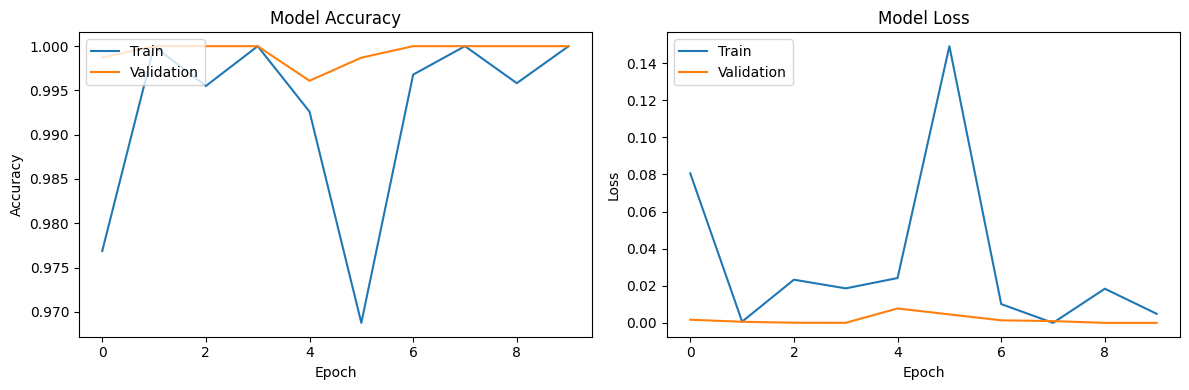

25/25 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step

Classification Report for Known Leaf Types:
              precision    recall  f1-score   support

        Rice       1.00      1.00      1.00       281
      Banana       0.99      1.00      0.99       180
       wheat       1.00      1.00      1.00       242
      Coffee       1.00      0.98      0.99        81

    accuracy                           1.00       784
   macro avg       1.00      0.99      1.00       784
weighted avg       1.00      1.00      1.00       784



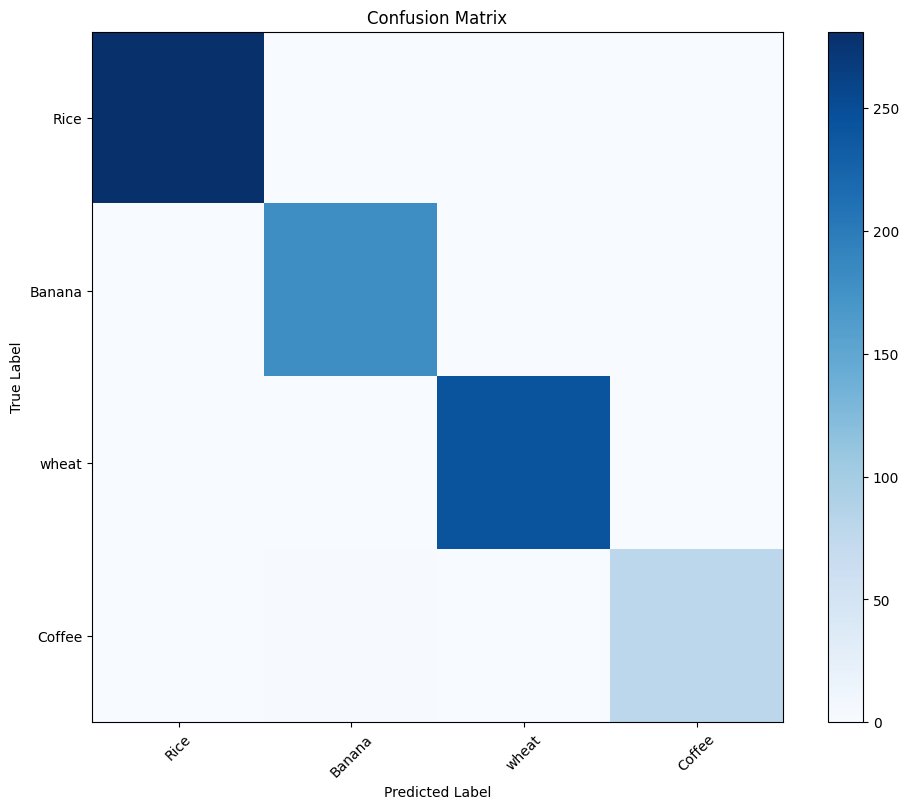


Class Indices:
Banana: 0
Coffee: 1
Rice: 2
wheat: 3

Example usage to detect unknown leaf types:

# Load the trained model
model = tf.keras.models.load_model("leaf_species_classifier.h5")

# Load class indices
with open('class_indices.txt', 'r') as f:
    class_indices = eval(f.read())

# Test on a new image
is_leaf, predicted_class, confidence, result = predict_image(
    "path_to_test_image.jpg", 
    model, 
    class_indices,
    confidence_threshold=0.7  # Adjust threshold as needed
)
print(result)



In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input, ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
import zipfile
import numpy as np
import random
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from collections import Counter
import tempfile
import shutil

from google.colab import drive
drive.mount('/content/drive')

# Set random seeds for reproducibility
tf.random.set_seed(42)
random.seed(42)

# Paths to zip files
leaf_zip = '/content/drive/My Drive/leaf_dataset.zip'
wheat_zip = '/content/drive/My Drive/wheat.zip'

# Common extraction directory
combined_dataset_path = '/content/combined_dataset/'

# Function to extract a zip file
def extract_zip(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

# Extract datasets
os.makedirs('/content/leaf_extracted/', exist_ok=True)
os.makedirs('/content/wheat_extracted/', exist_ok=True)

extract_zip(leaf_zip, '/content/leaf_extracted/')
extract_zip(wheat_zip, '/content/wheat_extracted/')

# Get leaf dataset folder
leaf_main_folder = os.path.join('/content/leaf_extracted/', os.listdir('/content/leaf_extracted/')[0])

# Get wheat dataset folder
wheat_main_folder = '/content/wheat_extracted/'

# Check if wheat_main_folder contains images directly
wheat_files = [f for f in os.listdir(wheat_main_folder) if os.path.isfile(os.path.join(wheat_main_folder, f))]

if wheat_files:
    # Create a class folder for wheat if it doesn't exist
    wheat_class_folder = os.path.join(wheat_main_folder, "wheat")
    os.makedirs(wheat_class_folder, exist_ok=True)

    # Move all wheat images into the new "wheat" folder
    for img in wheat_files:
        shutil.move(os.path.join(wheat_main_folder, img), os.path.join(wheat_class_folder, img))

    # Update wheat_main_folder to point to the new class folder
    wheat_main_folder = wheat_class_folder

# Ensure the combined dataset directory exists
os.makedirs(combined_dataset_path, exist_ok=True)

# Function to merge datasets (only merges folders, ignores files)
def merge_datasets(source_folder, target_folder):
    for class_name in os.listdir(source_folder):
        class_source = os.path.join(source_folder, class_name)

        # Only process directories, skip files
        if not os.path.isdir(class_source):
            continue  # Skip files

        class_target = os.path.join(target_folder, class_name)
        os.makedirs(class_target, exist_ok=True)

        # Move images to the combined dataset
        for img in os.listdir(class_source):
            img_source = os.path.join(class_source, img)
            img_target = os.path.join(class_target, img)

            # Only move actual image files
            if os.path.isfile(img_source):
                shutil.copy(img_source, img_target)  # Using copy instead of move to preserve originals

# Merge datasets
merge_datasets(leaf_main_folder, combined_dataset_path)
merge_datasets(wheat_main_folder, combined_dataset_path)

# Now check the dataset
species_classes = [d for d in os.listdir(combined_dataset_path) if os.path.isdir(os.path.join(combined_dataset_path, d))]
print("Known leaf classes:", species_classes)

# Image parameters
img_size = (224, 224)

# Data augmentation for the training set
datagen_train = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # ResNet50 normalization
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.8, 1.2],
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Set aside 20% for validation
)

# No augmentation for test set
datagen_test = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

# Create training and validation generators
train_generator = datagen_train.flow_from_directory(
    combined_dataset_path,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = datagen_test.flow_from_directory(
    combined_dataset_path,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Load ResNet50 as the feature extractor
base_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3)
)

# First, train the multi-class model with base model frozen
base_model.trainable = False

# Build the multi-class model
inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(len(species_classes), activation='softmax')(x)

multi_class_model = Model(inputs, outputs)
multi_class_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
multi_class_model.summary()

# Train the multi-class model
history = multi_class_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

# Save the multi-class model
multi_class_model.save("leaf_species_classifier.h5")

# Now we'll create a model that can identify whether an image contains a known leaf type or not
# This model will be used to determine if an image is "not a leaf" (not in our known classes)

# Let's define a function to create a feature extractor
def extract_features(model, image_path, target_size):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Get the prediction probabilities for known classes
    predictions = model.predict(img_array)
    max_prob = np.max(predictions)

    return max_prob, np.argmax(predictions)

# Function to predict if an image contains a known leaf type or not
def is_known_leaf(model, image_path, confidence_threshold=0.7):
    max_prob, predicted_class = extract_features(model, image_path, img_size)

    # If the max probability is below our threshold, consider it "not a leaf"
    if max_prob < confidence_threshold:
        return False, max_prob, predicted_class
    else:
        return True, max_prob, predicted_class

# Create a complete prediction function that tells us if it's one of our known leaf types or not
def predict_image(image_path, model, class_indices, confidence_threshold=0.7):
    is_leaf, confidence, class_idx = is_known_leaf(model, image_path, confidence_threshold)

    # Convert class index to name
    class_names = {v: k for k, v in class_indices.items()}
    predicted_class = class_names[class_idx] if is_leaf else "unknown/not_leaf"

    if is_leaf:
        result = f"This is a known leaf type: {predicted_class} (confidence: {confidence:.2f})"
    else:
        result = f"This is NOT a known leaf type (highest match: {predicted_class}, confidence: {confidence:.2f})"

    return is_leaf, predicted_class, confidence, result

# Evaluation metrics and visualization
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

# Plot training history
plot_training_history(history)

# Confusion matrix for known classes
predictions = multi_class_model.predict(validation_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = validation_generator.classes

print("\nClassification Report for Known Leaf Types:")
print(classification_report(y_true, y_pred, target_names=species_classes))

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(species_classes))
plt.xticks(tick_marks, species_classes, rotation=45)
plt.yticks(tick_marks, species_classes)
plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Save class indices
class_indices = train_generator.class_indices
with open('class_indices.txt', 'w') as f:
    f.write(str(class_indices))

print("\nClass Indices:")
for class_name, index in class_indices.items():
    print(f"{class_name}: {index}")

print("\nExample usage to detect unknown leaf types:")
print("""
# Load the trained model
model = tf.keras.models.load_model("leaf_species_classifier.h5")

# Load class indices
with open('class_indices.txt', 'r') as f:
    class_indices = eval(f.read())

# Test on a new image
is_leaf, predicted_class, confidence, result = predict_image(
    "path_to_test_image.jpg",
    model,
    class_indices,
    confidence_threshold=0.7  # Adjust threshold as needed
)
print(result)
""")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step

Test Image Results:
This is a known leaf type: Banana (confidence: 1.00)


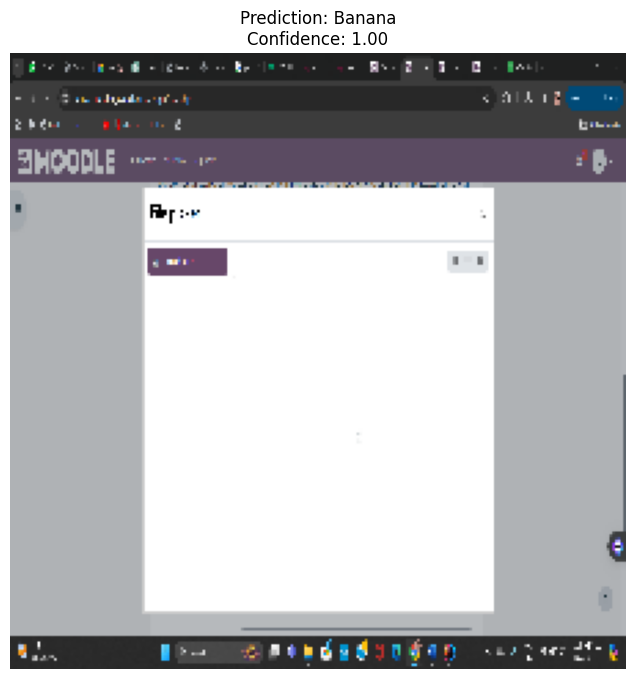

In [ ]:
# After training the model, you can directly use it for testing like this:

# Define the test image path
test_image_path = "/content/Screenshot (230).png"  # Replace with your test image path

# Get class indices directly from the generator
class_indices = train_generator.class_indices

# Define the prediction function (same as before)
def predict_image(image_path, model, class_indices, confidence_threshold=0.7):
    # Load and preprocess the image
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=img_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Get the prediction probabilities
    predictions = model.predict(img_array)
    max_prob = np.max(predictions)
    class_idx = np.argmax(predictions)

    # Convert class index to name
    class_names = {v: k for k, v in class_indices.items()}
    predicted_class = class_names[class_idx]

    # Determine if it's a known leaf type based on confidence
    is_leaf = max_prob >= confidence_threshold

    if is_leaf:
        result = f"This is a known leaf type: {predicted_class} (confidence: {max_prob:.2f})"
    else:
        result = f"This is NOT a known leaf type (highest match: {predicted_class}, confidence: {max_prob:.2f})"

    return is_leaf, predicted_class, max_prob, result

# Test the image directly with the trained model
is_leaf, predicted_class, confidence, result = predict_image(
    test_image_path,
    multi_class_model,  # Use the model directly
    class_indices,
    confidence_threshold=0.7
)

# Print the result
print("\nTest Image Results:")
print(result)

# You can also visualize the test image with its prediction
plt.figure(figsize=(8, 8))
img = tf.keras.preprocessing.image.load_img(test_image_path, target_size=img_size)
plt.imshow(img)
plt.title(f"Prediction: {predicted_class}\nConfidence: {confidence:.2f}")
plt.axis('off')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input, ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Input, Conv2D, MaxPooling2D, UpSampling2D
import zipfile
import numpy as np
import random
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from collections import Counter
import tempfile
import shutil
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set random seeds for reproducibility
tf.random.set_seed(42)
random.seed(42)

# Paths to zip files
leaf_zip = '/content/drive/My Drive/leaf_dataset.zip'
wheat_zip = '/content/drive/My Drive/wheat.zip'

# Common extraction directory
combined_dataset_path = '/content/combined_dataset/'

# Function to extract a zip file
def extract_zip(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

# Extract both datasets
extract_zip(leaf_zip, '/content/leaf_extracted/')
extract_zip(wheat_zip, '/content/wheat_extracted/')

# Get leaf dataset folder
leaf_main_folder = os.path.join('/content/leaf_extracted/', os.listdir('/content/leaf_extracted/')[0])

# Get wheat dataset folder
wheat_main_folder = '/content/wheat_extracted/'

# Process wheat dataset
wheat_files = [f for f in os.listdir(wheat_main_folder) if os.path.isfile(os.path.join(wheat_main_folder, f))]
if wheat_files:
    wheat_class_folder = os.path.join(wheat_main_folder, "wheat")
    os.makedirs(wheat_class_folder, exist_ok=True)
    for img in wheat_files:
        shutil.move(os.path.join(wheat_main_folder, img), os.path.join(wheat_class_folder, img))
    wheat_main_folder = wheat_class_folder

# Ensure the combined dataset directory exists
os.makedirs(combined_dataset_path, exist_ok=True)

# Function to merge datasets
def merge_datasets(source_folder, target_folder):
    for class_name in os.listdir(source_folder):
        class_source = os.path.join(source_folder, class_name)
        if not os.path.isdir(class_source):
            continue
        class_target = os.path.join(target_folder, class_name)
        os.makedirs(class_target, exist_ok=True)
        for img in os.listdir(class_source):
            img_source = os.path.join(class_source, img)
            img_target = os.path.join(class_target, img)
            if os.path.isfile(img_source):
                shutil.copy(img_source, img_target)

# Merge datasets
merge_datasets(leaf_main_folder, combined_dataset_path)
merge_datasets(wheat_main_folder, combined_dataset_path)

# Get species classes
species_classes = [d for d in os.listdir(combined_dataset_path) if os.path.isdir(os.path.join(combined_dataset_path, d))]
print("Species classes:", species_classes)

# Build Autoencoder
def build_autoencoder(img_size=(224, 224)):
    input_img = Input(shape=(*img_size, 3))

    # Encoder
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    # Create autoencoder model
    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder

# Create separate data generators for autoencoder and classifier
# For autoencoder - we need images to be both input and output
autoencoder_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize to 0-1 for the autoencoder
    validation_split=0.2
)

# For classifier - we use the original datagen with preprocess_input
classifier_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

# Autoencoder generators that return just images (not labels)
autoencoder_train_generator = autoencoder_datagen.flow_from_directory(
    combined_dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode=None,  # This returns just the images, no labels
    subset='training',
    shuffle=True
)

autoencoder_val_generator = autoencoder_datagen.flow_from_directory(
    combined_dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode=None,  # This returns just the images, no labels
    subset='validation',
    shuffle=True
)

# Classifier generators that return images with labels
classifier_train_generator = classifier_datagen.flow_from_directory(
    combined_dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

classifier_val_generator = classifier_datagen.flow_from_directory(
    combined_dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Create a generator that provides both input and target as the same image for autoencoder training
def autoencoder_generator(generator):
    for batch in generator:
        yield (batch, batch)  # Both input and output are the same images

# Build and train autoencoder
autoencoder = build_autoencoder()
print("Training autoencoder...")
autoencoder.fit(
    autoencoder_generator(autoencoder_train_generator),
    steps_per_epoch=len(autoencoder_train_generator),
    epochs=10,
    validation_data=autoencoder_generator(autoencoder_val_generator),
    validation_steps=len(autoencoder_val_generator)
)

# Build and train classifier (this part remains mostly the same)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(species_classes), activation='softmax')(x)
classifier = Model(inputs=base_model.input, outputs=predictions)

# Compile classifier
classifier.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train classifier
print("Training classifier...")
classifier.fit(
    classifier_train_generator,
    epochs=10,
    validation_data=classifier_val_generator
)

# Function to predict with validation
def predict_with_validation(image_path, reconstruction_threshold=0.15):
    # Load and preprocess image
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize for autoencoder

    # Get reconstruction
    reconstructed = autoencoder.predict(img_array)

    # Calculate reconstruction error
    reconstruction_error = np.mean(np.square(img_array - reconstructed))
    print(f"Reconstruction error: {reconstruction_error}")

    if reconstruction_error > reconstruction_threshold:
        return "Invalid image - Not a plant leaf"

    # If valid, proceed with classification
    preprocessed = preprocess_input(img_array * 255.0)  # Scale back up for ResNet
    prediction = classifier.predict(preprocessed)
    predicted_class = species_classes[np.argmax(prediction)]
    confidence = np.max(prediction)

    return f"Predicted class: {predicted_class} (Confidence: {confidence:.2f})"

# Save models
autoencoder.save('plant_autoencoder.h5')
classifier.save('plant_classifier.h5')

# Example usage (add your test image path):
"""
test_image_path = '/path/to/your/test/image.jpg'
result = predict_with_validation(test_image_path)
print(result)
"""

# Function to visualize reconstruction
def visualize_reconstruction(image_path):
    # Load and preprocess image
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Get reconstruction
    reconstructed = autoencoder.predict(img_array)

    # Plot original vs reconstructed
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(img_array[0])
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed[0])
    plt.title('Reconstructed Image')
    plt.axis('off')
    plt.show()

# Example usage for visualization:
"""
test_image_path = '/path/to/your/test/image.jpg'
visualize_reconstruction(test_image_path)
"""

Mounted at /content/drive
Species classes: ['Rice', 'Banana', 'Coffee', 'wheat']
Found 3144 images belonging to 4 classes.
Found 784 images belonging to 4 classes.
Found 3144 images belonging to 4 classes.
Found 784 images belonging to 4 classes.
Training autoencoder...
Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1175s 12s/step - loss: 0.0396 - val_loss: 0.0061
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1220s 12s/step - loss: 0.0052 - val_loss: 0.0036
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1219s 12s/step - loss: 0.0036 - val_loss: 0.0030
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1167s 12s/step - loss: 0.0032 - val_loss: 0.0026
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1222s 12s/step - loss: 0.0028 - val_loss: 0.0026
Epoch 6/10
10/99 ━━━━━━━━━━━━━━━━━━━━ 15:43 11s/step - loss: 0.0032

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input, ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
import zipfile
import numpy as np
import random
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from collections import Counter
import tempfile
import shutil

from google.colab import drive
drive.mount('/content/drive', force_remount=False)  # Don't force remount if already mounted

# Set random seeds for reproducibility
tf.random.set_seed(42)
random.seed(42)

# Paths to zip files - CORRECTED "Other.zip" filename
leaf_zip = '/content/drive/My Drive/leaf_dataset.zip'
other_zip = '/content/drive/My Drive/Other.zip'  # Corrected capitalization

# Common extraction directory
combined_dataset_path = '/content/combined_dataset/'

# First, clean up any existing directories to start fresh
for dir_path in ['/content/leaf_extracted/', '/content/other_extracted/', combined_dataset_path, '/content/test_set']:
    if os.path.exists(dir_path):
        shutil.rmtree(dir_path)

os.makedirs('/content/leaf_extracted/', exist_ok=True)
os.makedirs('/content/other_extracted/', exist_ok=True)
os.makedirs(combined_dataset_path, exist_ok=True)
os.makedirs('/content/test_set', exist_ok=True)

# Function to extract a zip file
def extract_zip(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

# Extract datasets
print(f"Extracting leaf dataset from {leaf_zip}...")
extract_zip(leaf_zip, '/content/leaf_extracted/')
print(f"Extracting other images from {other_zip}...")
extract_zip(other_zip, '/content/other_extracted/')

# Get leaf dataset folder
leaf_main_folder = os.path.join('/content/leaf_extracted/', os.listdir('/content/leaf_extracted/')[0])
print(f"Leaf dataset main folder: {leaf_main_folder}")

# Get other dataset folder
other_main_folder = '/content/other_extracted/'
print(f"Other dataset folder: {other_main_folder}")

# Check if the other folder contains images directly
other_files = [f for f in os.listdir(other_main_folder) if os.path.isfile(os.path.join(other_main_folder, f))]

if other_files:
    # Create a class folder for "other" if it doesn't exist
    other_class_folder = os.path.join(other_main_folder, "other")
    os.makedirs(other_class_folder, exist_ok=True)

    # Move all "other" images into the new "other" folder
    for img in other_files:
        shutil.move(os.path.join(other_main_folder, img), os.path.join(other_class_folder, img))

    # Update other_main_folder to point to the new class folder
    other_main_folder = other_class_folder
    print(f"Created 'other' subfolder for images: {other_class_folder}")

# Normalize class names to lowercase to avoid case sensitivity issues
def normalize_class_name(name):
    # Normalize all class names to lowercase to avoid duplicates like 'other' and 'Other'
    return name.lower()

# Function to merge datasets (only merges folders, ignores files)
def merge_datasets(source_folder, target_folder, keep_only=None):
    print(f"Merging from {source_folder} to {target_folder}")
    print(f"Classes to keep separately: {keep_only}")

    # List classes in source folder
    classes_in_source = [d for d in os.listdir(source_folder) if os.path.isdir(os.path.join(source_folder, d))]
    print(f"Classes found in source: {classes_in_source}")

    for class_name in classes_in_source:
        class_source = os.path.join(source_folder, class_name)

        # Only process directories, skip files
        if not os.path.isdir(class_source):
            continue  # Skip files

        # Normalize class name to lowercase for comparison
        normalized_class = normalize_class_name(class_name)

        # If keep_only is specified, check if this class should be kept or moved to "other"
        target_class_name = normalized_class  # Start with normalized name
        if keep_only is not None:
            normalized_keep_only = [normalize_class_name(k) for k in keep_only]
            if normalized_class not in normalized_keep_only:
                target_class_name = "other"  # Use consistent lowercase 'other'

        class_target = os.path.join(target_folder, target_class_name)
        os.makedirs(class_target, exist_ok=True)

        # Count files before copying
        files_count = len([f for f in os.listdir(class_source) if os.path.isfile(os.path.join(class_source, f))])
        print(f"Processing class {class_name} → {target_class_name}: {files_count} files")

        # Move images to the combined dataset
        for img in os.listdir(class_source):
            img_source = os.path.join(class_source, img)

            # Add a prefix to avoid filename collisions when merging into 'other'
            if target_class_name == "other" and normalized_class != "other":
                img_target = os.path.join(class_target, f"{normalized_class}_{img}")
            else:
                img_target = os.path.join(class_target, img)

            # Only copy actual image files
            if os.path.isfile(img_source):
                shutil.copy(img_source, img_target)  # Use copy instead of move to preserve original files

# Define the main classes you want to keep separate (your 3 main categories)
# Replace these with your actual class names - for example ["wheat", "corn", "rice"]
main_classes = ["Banana", "Coffee", "Rice"]  # Update with your 3 actual class names

# Merge the leaf dataset, putting specified classes in their own folders and everything else in "other"
merge_datasets(leaf_main_folder, combined_dataset_path, keep_only=main_classes)

# Merge the "other" folder directly - ensure it goes to lowercase "other"
merge_datasets(other_main_folder, combined_dataset_path)

# Now check the dataset - normalize all class names to lowercase
species_classes = [normalize_class_name(d) for d in os.listdir(combined_dataset_path)
                   if os.path.isdir(os.path.join(combined_dataset_path, d))]
species_classes = sorted(list(set(species_classes)))  # Remove duplicates and sort
print("Final species classes:", species_classes)

# Count images per class
class_counts = {}
for species in species_classes:
    # Find all directories that match this species when normalized
    matching_dirs = [d for d in os.listdir(combined_dataset_path)
                     if os.path.isdir(os.path.join(combined_dataset_path, d))
                     and normalize_class_name(d) == species]

    # Create a properly named directory for this class
    proper_class_path = os.path.join(combined_dataset_path, species)
    os.makedirs(proper_class_path, exist_ok=True)

    # Count and consolidate all images
    count = 0
    for dir_name in matching_dirs:
        dir_path = os.path.join(combined_dataset_path, dir_name)
        if dir_path != proper_class_path:  # Don't process the target dir itself
            for img in os.listdir(dir_path):
                img_path = os.path.join(dir_path, img)
                if os.path.isfile(img_path):
                    count += 1
                    shutil.copy(img_path, os.path.join(proper_class_path, img))

            # Remove the duplicate directory after copying files
            if dir_name != species:
                shutil.rmtree(dir_path)

    # Recount files in the final directory
    class_counts[species] = len([f for f in os.listdir(proper_class_path)
                                if os.path.isfile(os.path.join(proper_class_path, f))])

print("Image count per class:", class_counts)

# Create balanced dataset with handling of class imbalance
temp_dir = tempfile.mkdtemp()

# Determine appropriate target count for balancing
# We'll use a reasonable count to avoid excessive oversampling or undersampling
max_count = max(class_counts.values())
min_count = min(class_counts.values())
target_count = min(max_count, max(min_count * 2, 2000))  # Balance between classes

print(f"Balancing classes to target count: {target_count}")

# Balance dataset via augmentation
for species in species_classes:
    count = class_counts[species]
    species_dir = os.path.join(temp_dir, species)
    os.makedirs(species_dir, exist_ok=True)
    source_dir = os.path.join(combined_dataset_path, species)

    # Copy original images
    for file in os.listdir(source_dir):
        if os.path.isfile(os.path.join(source_dir, file)):
            shutil.copy(os.path.join(source_dir, file), os.path.join(species_dir, file))

    # For classes with more images than target, subsample
    if count > target_count:
        # List all files and select random subset
        all_files = [f for f in os.listdir(species_dir) if os.path.isfile(os.path.join(species_dir, f))]
        files_to_keep = random.sample(all_files, target_count)

        # Remove excess files
        for file in all_files:
            if file not in files_to_keep:
                os.remove(os.path.join(species_dir, file))

        print(f"Subsampled '{species}' class from {count} to {target_count} images")
        count = target_count  # Update count

    # Augment underrepresented classes
    if count < target_count:
        print(f"Augmenting class '{species}' from {count} to {target_count} images")

        datagen_augment = ImageDataGenerator(
            preprocessing_function=preprocess_input,
            brightness_range=[0.8, 1.2],
            rotation_range=20,
            width_shift_range=0.2,
            height_shift_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True
        )

        # Create a temporary folder for this class's augmentation
        temp_aug_dir = os.path.join(tempfile.mkdtemp(), species)
        os.makedirs(temp_aug_dir, exist_ok=True)

        # Copy original images to temp augmentation directory
        for file in os.listdir(species_dir):
            shutil.copy(os.path.join(species_dir, file), os.path.join(temp_aug_dir, file))

        # Set up augmentation generator for just this class
        class_gen = datagen_augment.flow_from_directory(
            os.path.dirname(temp_aug_dir),
            target_size=(224, 224),  # Set image size
            batch_size=32,
            class_mode='categorical',
            classes=[species],
            shuffle=True
        )

        # Generate augmented images
        images_generated = 0
        needed_images = target_count - count

        while images_generated < needed_images:
            batch_images, _ = next(class_gen)
            for i in range(min(len(batch_images), needed_images - images_generated)):
                img_path = os.path.join(species_dir, f"aug_{images_generated + i}.jpg")
                tf.keras.utils.save_img(img_path, batch_images[i])

            images_generated += min(len(batch_images), needed_images - images_generated)

        # Clean up temporary augmentation directory
        shutil.rmtree(os.path.dirname(temp_aug_dir))

print("Augmentation completed. Balanced dataset created.")

# Verify the balanced dataset
balanced_counts = {}
for species in os.listdir(temp_dir):
    species_path = os.path.join(temp_dir, species)
    if os.path.isdir(species_path):
        balanced_counts[species] = len([f for f in os.listdir(species_path)
                                       if os.path.isfile(os.path.join(species_path, f))])

print("Balanced dataset counts:", balanced_counts)

# Load ResNet50 without the top layer for feature extraction
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model

# Data augmentation for training
datagen_train = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # ResNet50 normalization
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.9, 1.1],
    horizontal_flip=True,
    validation_split=0.2  # Use validation split
)

# Create train and validation generators
train_generator = datagen_train.flow_from_directory(
    temp_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = datagen_train.flow_from_directory(
    temp_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Build the complete model
inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)  # Pass raw images through ResNet50 (frozen)
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(len(species_classes), activation='softmax')(x)

# Define and compile the model
model = Model(inputs, outputs)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Add callbacks for better training
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=2)
]

# Train the model
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    callbacks=callbacks
)

# Create a separate test set generator from the balanced dataset
datagen_test = ImageDataGenerator(preprocessing_function=preprocess_input)

# Split the balanced dataset into test and remainder
for class_name in species_classes:
    # Create test directory if it doesn't exist
    test_dir = os.path.join('/content/test_set', class_name)
os.makedirs(test_dir, exist_ok=True)

    # Get list of files for this class
class_path = os.path.join(temp_dir, class_name)
if os.path.exists(class_path):
    class_files = [f for f in os.listdir(class_path)
                  if os.path.isfile(os.path.join(class_path, f))]

    # Select 20% of files for test set
    test_files = random.sample(class_files, k=int(len(class_files) * 0.2))

    # Move test files to test directory
    for file in test_files:
        shutil.copy(
            os.path.join(class_path, file),
            os.path.join(test_dir, file)
        )

print("Test set created.")

# Create test generator
test_generator = datagen_test.flow_from_directory(
    '/content/test_set',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Predict on test set
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = test_generator.classes

# Get class names
class_names = list(test_generator.class_indices.keys())

# Classification report
print("\nTest Set Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

# Confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title("Test Set Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names)

# Add numbers to confusion matrix
for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j, i, str(conf_matrix[i, j]),
                 ha="center", va="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.tight_layout()
plt.show()

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()
plt.show()

# Save the model
model.save("plant_classification_model.h5")
from google.colab import files
files.download("plant_classification_model.h5")

# Save class indices
class_indices = test_generator.class_indices
with open('class_indices.txt', 'w') as f:
    f.write(str(class_indices))
files.download('class_indices.txt')

# Print class mapping
print("\nClass Indices:")
for class_name, index in class_indices.items():
    print(f"{class_name}: {index}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Extracting leaf dataset from /content/drive/My Drive/leaf_dataset.zip...


KeyboardInterrupt: 

In [12]:
# Create a separate test set generator from the balanced dataset
datagen_test = ImageDataGenerator(preprocessing_function=preprocess_input)

# Split the balanced dataset into test and remainder
for class_name in species_classes:
    # Create test directory if it doesn't exist
    test_dir = os.path.join('/content/test_set', class_name)
os.makedirs(test_dir, exist_ok=True)

    # Get list of files for this class
class_path = os.path.join(temp_dir, class_name)
if os.path.exists(class_path):
    class_files = [f for f in os.listdir(class_path)
                  if os.path.isfile(os.path.join(class_path, f))]

    # Select 20% of files for test set
    test_files = random.sample(class_files, k=int(len(class_files) * 0.2))

    # Move test files to test directory
    for file in test_files:
        shutil.copy(
            os.path.join(class_path, file),
            os.path.join(test_dir, file)
        )

print("Test set created.")

# Create test generator
test_generator = datagen_test.flow_from_directory(
    '/content/test_set',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Predict on test set
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = test_generator.classes

# Get class names
class_names = list(test_generator.class_indices.keys())

# Classification report
print("\nTest Set Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

# Confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title("Test Set Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names)

# Add numbers to confusion matrix
for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j, i, str(conf_matrix[i, j]),
                 ha="center", va="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.tight_layout()
plt.show()

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()
plt.show()

# Save the model
model.save("plant_classification_model.h5")
from google.colab import files
files.download("plant_classification_model.h5")

# Save class indices
class_indices = test_generator.class_indices
with open('class_indices.txt', 'w') as f:
    f.write(str(class_indices))
files.download('class_indices.txt')

# Print class mapping
print("\nClass Indices:")
for class_name, index in class_indices.items():
    print(f"{class_name}: {index}")

Test set created.
Found 400 images belonging to 1 classes.
13/13 ━━━━━━━━━━━━━━━━━━━━ 82s 6s/step - accuracy: 3.5714e-04 - loss: 111.6984
Test Accuracy: 0.25%
13/13 ━━━━━━━━━━━━━━━━━━━━ 79s 6s/step

Test Set Classification Report:


ValueError: Number of classes, 2, does not match size of target_names, 1. Try specifying the labels parameter